## i honestly have never practiced the divisive hierachial before ,just know that it is a top-down uproach, i did not want to just copy the code from net,so i thought of doing it in the methods i have been using in the past few months that is agglomerative and k means algo

## Loading the libraries

In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [33]:
pwd

'C:\\Users\\admin'

In [34]:
dataset=pd.read_csv("C:\\Users\\admin\\Desktop\\Datasets\\iris dataset\\Iris.csv")

In [35]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
dataset.shape

(150, 6)

In [38]:
dataset.drop('Id',axis=1,inplace=True)

In [39]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## changing species column from strings to intergers

In [40]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le=LabelEncoder()
dataset["Species"]=le.fit_transform(dataset["Species"])

In [51]:
dataset.shape

(150, 5)

In [77]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Normalize the data

In [29]:
from sklearn.preprocessing import normalize

In [84]:
cluster_data=normalize(dataset)
cluster_data=pd.DataFrame(cluster_data,columns=dataset.columns)

In [85]:
cluster_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,0.000000
1,0.828133,0.507020,0.236609,0.033801,0.000000
2,0.805333,0.548312,0.222752,0.034269,0.000000
3,0.800030,0.539151,0.260879,0.034784,0.000000
4,0.790965,0.569495,0.221470,0.031639,0.000000
...,...,...,...,...,...
145,0.705380,0.315842,0.547459,0.242146,0.210561
146,0.710833,0.282077,0.564153,0.214378,0.225661
147,0.699734,0.322954,0.559787,0.215303,0.215303
148,0.659239,0.361518,0.574176,0.244556,0.212658


In [86]:
"""draw the dendrogram"""
import scipy.cluster.hierarchy as shc

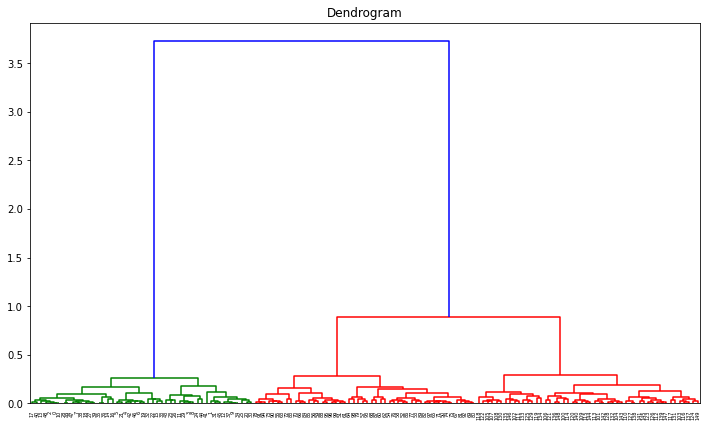

In [92]:
plt.figure(fdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsMAAAGrCAYAAAAlw5roAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nO3de7xcVX338e/PJNwMEJEjhGsAo1UsjTx5QORBTq1yKxZfrVag1YqPjVoVaa1IUVHxaUVrvQElxkeLVqNVsYoaSqkQBC1gwMNdJV6ASIBA5JBACBB+/WOtnbPPOntm9szZc27r8369zuucmVmz9lpr79n7u9fsM2PuLgAAACBHT5vsBgAAAACThTAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAKYAM3u9mV092e0AgNwQhgGgBTP7tZltMrMNZvaQmf3IzN5sZuw7AWCGYIcOAO29wt13lLSvpHMkvVvS5yayAWY2eyrXBwDTGWEYAGpw92F3v1jSayT9hZm9wMy2NbOPmdldZnafmS01s+0lycwGzWyNmb3TzO43s7VmdkpRn5k908wuNrOHzew6SQeUl2dmbmZvNbM7JN0R7/tLM1ttZuvjc/colT/KzH5mZsNm9s9mdqWZvTE+9noz+6GZfcLM1kv6gJkdYGaXm9mDZvaAmX3ZzOaV6vu1mb3LzG4ys0fM7HNmtpuZXRJnyv/LzJ7RxyEHgAlBGAaALrj7dZLWSDpC0kckPUfSIknPlrSnpLNKxXeXtHO8//9KOr8UIM+X9Jik+ZLeEH9Sr5R0qKTnm9lLJX1Y0p/G59wp6auSZGa7SvqGpL+T9ExJP5P04qSuQyX9UtKzJP29JIv17SHpeZL2lvSB5Dl/IunlsY+vkHSJpDMl7apw/Di15UABwDRBGAaA7t0jaRdJfynpr919vbtvkPQPkk4slXtC0tnu/oS7r5C0UdJzzWyWQtA8y90fcfdbJH2hYjkfjnVvkvRnkj7v7je4+2aF4HuYmS2QdJykW939m+7+pKRPS7o3bbO7n+vuT7r7Jndf7e6Xuftmd18n6eOSjkyec6673+fuv5F0laRr3f0ncfn/LumFPYwdAEwpXDcGAN3bU2H/uYOk682suN8kzSqVezCG08KjkuZKGojPv7v02J0Vyyk/voekG4ob7r7RzB6MbdmjXNbd3czWtKlLZvYshdB8hKQdFSZHfps8577S35sqbs+taDMATCvMDANAF8zsfysE0G8pBMID3X1e/NnZ3esExHWSnlS4NKGwT0U5L/19j8I/8RXteLrCJRG/kbRW0l6lx6x8u6IuKVwi4ZIOcvedJP25QpgHgKwQhgGgBjPbycyOV7hO90vufqOkz0r6RJxllZntaWZHd6rL3bdI+qbCP7LtYGbPl/QXHZ62XNIpZrbIzLZVuCTjWnf/taTvSfpdM3tl/KSItypcr9zOjgqXbTxkZntKelendgPATEQYBoD2vmNmGxQuM3iPwrW1xadCvFvSaknXmNnDkv5L0nNr1vs2hcsM7pV0oaR/aVfY3b8v6X2SLlKYCT5A8fpkd39A0qslfVTSg5KeL2mVpM1tqvygpIMlDSuE6W/WbDcAzCjmnr5zBgCYzuKXgqyR9GfufsVktwcApjJmhgFgBjCzo81sXryE4kyF63+vmeRmAcCURxgGgJnhMEm/kPSAwmcCvzJ+JBsAoA0ukwAAAEC2mBkGAABAtgjDAAAAyNakfQPdrrvu6gsWLJisxQMAACAT119//QPuPlD12KSF4QULFmjVqlWTtXgAAABkwsyqvvJeEpdJAAAAIGOEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyNbsyW4AZr5ly6Tlyye7FQAw1sknS0uWTHYrAEwmZobRd8uXS0NDk90KABhtaIgTdQDMDGOCLFokrVw52a0AgBGDg5PdAgBTATPDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMhWxzBsZtuZ2XVmdqOZ3WpmH6woM2hmw2Y2FH/O6k9zAQAAgObMrlFms6SXuvtGM5sj6Wozu8Tdr0nKXeXuxzffRAAAAKA/OoZhd3dJG+PNOfHH+9koAAAAYCLUumbYzGaZ2ZCk+yVd5u7XVhQ7LF5KcYmZHdiiniVmtsrMVq1bt24czQYAAADGr1YYdvct7r5I0l6SDjGzFyRFbpC0r7v/nqRzJX2rRT3L3H2xuy8eGBgYT7sBAACAcevq0yTc/SFJKyUdk9z/sLtvjH+vkDTHzHZtqpEAAABAP9T5NIkBM5sX/95e0ssk/TQps7uZWfz7kFjvg803FwAAAGhOnU+TmC/pC2Y2SyHkfs3dv2tmb5Ykd18q6VWS3mJmT0raJOnE+I93AAAAwJRV59MkbpL0wor7l5b+Pk/Sec02DQAAAOgvvoEOAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtjqGYTPbzsyuM7MbzexWM/tgRRkzs0+b2Wozu8nMDu5PcwEAAIDmzK5RZrOkl7r7RjObI+lqM7vE3a8plTlW0sL4c6ikC+JvAAAAYMrqODPswcZ4c0788aTYCZK+GMteI2memc1vtqkAAABAs2pdM2xms8xsSNL9ki5z92uTIntKurt0e028DwAAAJiyaoVhd9/i7osk7SXpEDN7QVLEqp6W3mFmS8xslZmtWrduXfetBQAAABrU1adJuPtDklZKOiZ5aI2kvUu395J0T8Xzl7n7YndfPDAw0GVTAQAAgGbV+TSJATObF//eXtLLJP00KXaxpNfFT5V4kaRhd1/beGsBAACABtX5NIn5kr5gZrMUwvPX3P27ZvZmSXL3pZJWSDpO0mpJj0o6pU/tBQAAABrTMQy7+02SXlhx/9LS3y7prc02DQAAAOgvvoEOAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyFbHMGxme5vZFWZ2u5ndambvqCgzaGbDZjYUf87qT3MBAACA5syuUeZJSe909xvMbEdJ15vZZe5+W1LuKnc/vvkmAgAAAP3RcWbY3de6+w3x7w2Sbpe0Z78bBgAAAPRbV9cMm9kCSS+UdG3Fw4eZ2Y1mdomZHdji+UvMbJWZrVq3bl3XjQUAAACaVDsMm9lcSRdJOs3dH04evkHSvu7+e5LOlfStqjrcfZm7L3b3xQMDA722GQAAAGhErTBsZnMUgvCX3f2b6ePu/rC7b4x/r5A0x8x2bbSlAAAAQMPqfJqESfqcpNvd/eMtyuwey8nMDon1PthkQwEAAICm1fk0icMlvVbSzWY2FO87U9I+kuTuSyW9StJbzOxJSZskneju3of2AgAAAI3pGIbd/WpJ1qHMeZLOa6pRAAAAwETgG+gAAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkq2MYNrO9zewKM7vdzG41s3dUlDEz+7SZrTazm8zs4P40FwAAAGjO7BplnpT0Tne/wcx2lHS9mV3m7reVyhwraWH8OVTSBfE3AAAAMGV1nBl297XufkP8e4Ok2yXtmRQ7QdIXPbhG0jwzm994awEAAIAGdXXNsJktkPRCSdcmD+0p6e7S7TUaG5gBAACAKaV2GDazuZIuknSauz+cPlzxFK+oY4mZrTKzVevWreuupQAAAEDDaoVhM5ujEIS/7O7frCiyRtLepdt7SbonLeTuy9x9sbsvHhgY6KW9AAAAQGPqfJqESfqcpNvd/eMtil0s6XXxUyVeJGnY3dc22E4AAACgcXU+TeJwSa+VdLOZDcX7zpS0jyS5+1JJKyQdJ2m1pEclndJ8UwEAAIBmdQzD7n61qq8JLpdxSW9tqlEAAADAROAb6AAAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsdQzDZvZ5M7vfzG5p8figmQ2b2VD8Oav5ZgIAAADNm12jzIWSzpP0xTZlrnL34xtpEQAAADBBOs4Mu/sPJK2fgLYAAAAAE6qpa4YPM7MbzewSMzuwoToBAACAvqpzmUQnN0ja1903mtlxkr4laWFVQTNbImmJJO2zzz4NLBoAAADo3bhnht39YXffGP9eIWmOme3aouwyd1/s7osHBgbGu2gAAABgXMYdhs1sdzOz+Pchsc4Hx1svAAAA0G8dL5Mws69IGpS0q5mtkfR+SXMkyd2XSnqVpLeY2ZOSNkk60d29by0GAAAAGtIxDLv7SR0eP0/ho9cAAACAaYVvoAMAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACy1TEMm9nnzex+M7ulxeNmZp82s9VmdpOZHdx8MwEAAIDm1ZkZvlDSMW0eP1bSwvizRNIF428WAAAA0H8dw7C7/0DS+jZFTpD0RQ+ukTTPzOY31UAAAACgX5q4ZnhPSXeXbq+J941hZkvMbJWZrVq3bl0DiwYAAAB610QYtor7vKqguy9z98XuvnhgYKCBRQMAAAC9ayIMr5G0d+n2XpLuaaBeAAAAoK+aCMMXS3pd/FSJF0kadve1DdQLAAAA9NXsTgXM7CuSBiXtamZrJL1f0hxJcvelklZIOk7SakmPSjqlX40FAAAAmtQxDLv7SR0ed0lvbaxFAAAAwAThG+gAAACQLcIwAAAAskUYBgAAQLYIwwAAAMhWx3+gAwC0sGyZtHz5ZLcCvRr6ZPg9eNrktgO9OflkacmSyW4FZgDCMAD0avlyaWhIWrRosluCHqxcRAietoaGwm/CMBpAGAaA8Vi0SFq5crJbAeRlcHCyW4AZhGuGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBsEYYBAACQLcIwAAAAskUYBgAAQLYIwwAAAMgWYRgAAADZIgwDAAAgW4RhAAAAZIswDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGSLMAwAAIBs1QrDZnaMmf3MzFab2RkVjw+a2bCZDcWfs5pvKgAAANCs2Z0KmNksSedLermkNZJ+bGYXu/ttSdGr3P34PrQRAAAA6Is6M8OHSFrt7r9098clfVXSCf1tFgAAANB/dcLwnpLuLt1eE+9LHWZmN5rZJWZ2YCOtAwAAAPqo42USkqziPk9u3yBpX3ffaGbHSfqWpIVjKjJbImmJJO2zzz5dNhUAAABoVp2Z4TWS9i7d3kvSPeUC7v6wu2+Mf6+QNMfMdk0rcvdl7r7Y3RcPDAyMo9kAAADA+NUJwz+WtNDM9jOzbSSdKOnicgEz293MLP59SKz3waYbCwAAADSp42US7v6kmb1N0qWSZkn6vLvfamZvjo8vlfQqSW8xsyclbZJ0orunl1IAAAAAU0qda4aLSx9WJPctLf19nqTzmm0aAAAA0F98Ax0AAACyRRgGAABAtgjDAAAAyBZhGAAAANkiDAMAACBbhGEAAABkizAMAACAbBGGAQAAkC3CMAAAALJFGAYAAEC2CMMAAADIFmEYAAAA2SIMAwAAIFuEYQAAAGRr9mQ3AAAANGzZMmn58sluRf8MDYXfg4OT2oy+O/lkacmSyW7FjEcYBjC1TKeD+HQ7IHNgzcfy5WH7XLRoslvSHzO1X2XF/oXXbN8RhgFMLdPpID4d2ljgwJqfRYuklSsnuxXo1XQ5yZ4BCMPT1LLrl2n5zdNj9mzo3k9KkgYvPG2SW1Lfyb97spb8L0LDpOEg3jwOrABQiTA8TS2/ebmG7h3Sot2n/szUojOmTwiWpKF7wwwaYRgAgJmPMDyNLdp9kVa+fuVkN2PGGbxwcLKbAAAAJggfrQYAAIBsEYYBAACQLcIwAAAAskUYBgAAQLb4BzoAAJAHvtSnf6bxl/oQhjGjNPH5y8VHqzXxqRJ8XjEATCF8qU9/TPMv9SEMN2AyvgCjycBW13QIdk18/nJTn93M5xWja/2cter3LNM0nhVCZvhSn+ZNl9nrFgjDDZiML8CY6C/bmE7Bbqp8/nK2n1c83kDXVGibjuGsn7NW/ZxlmuazQgDyRhhuyFQJYP2SbbBD98Yb6JoIbdM5nDU9azVR10gODfV3dmg6ntwAmBYIwwCaN9lvQ07zt+waNRHXSPb72sbpfHIDYMojDAPATDfZJyfjxckN0Jx+vFvUr/9JmKB3hAjDQA/q/NNkN//kOB3+ORHABGgqqOR87T3a68e7Rf14d2gC3xEiDGeol0+/6PXTK2ZqyKvzT5N1/8lxOv1z4qTpNiB0GwQ44DeHWafxaSqozKRr75vcpprelqbiNlTHdHi3aALfEZrxYXgiPvZsIj7mrMlQ2cunX/Ty6RUzPeQ19U+TU/6fE6dCEO02IHQTBKbKAX+mYNZp/PoZVHp5PXcTSvoRDpvcplrVsXatdN993dU1PBza1UtQn64heoaa8WF4Ij72rN8fc9aPUDkRn37RVMjr5oSm2xOTmTpz3aipEkT7FRC4HrV5zDpNXd28nrsNn/08wej3NjU4GMLwRHzRxVQ+EcvUjA/D0vT/2LMpP3PYZ92c0JTLrN2wVvc90vpMf3jzsIbuHWobtAnLEUEUmDnG+3puN7vcaia500xopzql3urtxkSdxLHfm3KyCMPTTToT2mq2M6eg1ssJzeCFg7rvkft6nrnvdUa+20tzmM3OVNXBv9VBv5sDflpvE3VOZb1eT9rrtaNNjFuvwa+p5Y9Xq9nlVrOqdWZC281Yj6fenNR9LXSz7fdze+vU3jrtbKh9UzoMN3G9b1PX805kAElnQqvC3Ey/Hrcp43lXoNdtpttLc7oJ66z3LtU5OEzWgaHq4F910O/2gJ/W20SdhSbHs6mx7PV60l7eDm8qfPUS/JpcfhPqzKKWt5dixrjdeu9UZ6sTyJl6otetuq+F8uPtrpXudE30eMe5U3s79aPB18OUDsNNXO/bxPW8kxFAqkJc1Yzx4IWDU2amsKp9j295XPPOmbf1vnR9TJW2lxX9KJ9IddvOXkJ43ZO/Yr230/W4TvRMVbG8ct2T9Y83dUNREzveNBwUyn3vdMCvM06tQkW34STV1Hg2Heqm49vbvbS5l+V3eqegn8Ex3V7Gu97bnegVoa4c4CYjFDd1wthr27vdrnq9Vrqp13C3J1VV7Wjg8pkpE4argkARRqo0GaLqfmZs4wGkS+WTgyJUtgrq7frUaba8135UzWgP3TukjY9v1Nxt5rZsR6e2p6G6qL9f4532Y6JOhnr9uLb02uj0Wuha4zTRM1VNHyQLrQ78hfFct1jUN54db7nfrfre7oDfbpzqnGB0M+7tLuNI1el/1bopj+VUnM2rc8lJP9rdajvs5drZdJ3vtlsIP0ND1TN/VfWMJ1CXw05Vu7s9MW4VnopQd+SRo9vY7bY93lnmJk4YJ/odgF5m5KXeZ+W7Xef9uCwnUSsMm9kxkj4laZak/+/u5ySPW3z8OEmPSnq9u99QuxWqDgKLdl+ktRvWjgnFVf/4NJ5g1CmEFPe3+4esdv+M1WRoS2ccWwXadn1q15+iH//0o38a9VjdGd1W7SvuqzO7XSdUVwXUOtda110X5X7UuVyivOymlltXu2ujuwryvZyhP/64dPXV0ryR2f9RO6gmDpJS/RBSFSTXrh174K8bHNL2SmPfVmz1VmKrZaTjXNX3tEydGd26QbebcDI8LO28cwhQ8+ePHs9W/a8ztmk9ndZNnXcunvvc6rd7q9ZlLycv0uggmba727rLqsLm8LA0a1a4PXfuyPLnzx8pV3c2NF3n6Uxgp3rG+7pqp8kT407bdqtlFs+VRr++627brd7xKfRyEl73ZLGX/WT5eXUCadOXdNVZ5+3GtO5YdPHuR8cwbGazJJ0v6eWS1kj6sZld7O63lYodK2lh/DlU0gXxd1tVAUIaHRyqDvRFiCue00Q4bhVCym2875H7NLx5WDtvu7Mkaben76b5O84f85xyyGw6uHeSvsVftcyiTFV/yrOh6Yxu0a9yn7rtS93Z7U6huiqgpiF6t6fvNmY7ue431+n0y07fuox0bHqV9qt8EtdqvPoV3tO6W15Ok+44Hn98JNS2CrTpTmybbcLzypp6u7LX8FQVNjvNGKUHhrTf5TJF34qQ2Okg2sTMYVNBt9dlzZ/fOUzVCUadQlnar6pgLo0OhUVA/cUvpC1bRgLkNtuEn6J9rQKO1N1JW7nNRb2twnGvoXvRonB748YQhIvb5fVQbk+d2dBWfapbTy/Pqavp2eNW6rzOq9Zxp2276h2fQqtxSfe/7fYp7barXpadPq+qbK+XdF133djjSJ19Qbv2tTr5ajcWdcagpM7M8CGSVrv7LyXJzL4q6QRJ5TB8gqQvurtLusbM5pnZfHdf267i5Tcv15V3Xqkj9z1yazC58s4rQ7s7BKOfr/+5jtz3yK33Dd07NCZ8pKGnKuwOXjg4KoSkZaraOHTvkIY3D0vS1jBcp33lti2/efmYZRUhqF17Oim3t5COaasyVbOh7fpVta7qqDu73Yu0D1XroXwC0Gsfell2p/WQnhyk23G5TKftIq27sp/Ll0tXXhkOZsXBthw4pPC41PqgWOzE0oPkz38+cpCsqqOudFnlerupu86OtxiLVvVWlWmqfXU0EXSbWlZVMOplnXeaJU/HvKi7zrgfckj7MtLYg2u5LXXa3K96i7qlzuu8qe2il3omapus8/pssp5267jOc4rnFYpZyvLj6f63qLuXfUrVu3rF8quW3aqfZa3aV152Op5Vx5GJ3v/XeeetgoX82qaA2askHePub4y3XyvpUHd/W6nMdyWd4+5Xx9vfl/Rud1+V1LVEUtHq50r6Wa1WAgAAAL3b190Hqh6oMzNsFfelCbpOGbn7MknLaiwTAAAA6Lun1SizRtLepdt7SbqnhzIAAADAlFInDP9Y0kIz28/MtpF0oqSLkzIXS3qdBS+SNNzpemEAAABgsnW8TMLdnzSzt0m6VOGj1T7v7rea2Zvj40slrVD4WLXVCh+tdkr/mgwAAAA0o+M/0AEAAAAzVZ3LJAAAAIAZiTAMAACAbBGGAQAAkK06nzM8ZZnZSQof43aBpMPc/TIze72kZ8Ui97n7Fxpa1mckfVvSpe6+pYk6m2RmByusz1dKut3d/7WizJ/GPw+X9EN3/1qNeo+Lfx6q8CkhH2+oyRMqflmMSdpZ0iZJu0vaKGmupM3u/o8NLONod790vPXEut6o8O2PkvRtd/9eE/UCmHxmtpOkDT7Of9op12Nm8yTJ3R/q8JxnSlo/3mUndc6TtMXdN3S4b667b+y2PWmZdPyq+p4uKy3T4jlj2lzRljF96EWdbaDTsrpY51gepRIAABAGSURBVE1tb23XVZ3x69eyY5mqdV6rPZMShuNXOl8h6SJ3fyDed6qkbRUCy6ZYdPv49/bu/lEz+0dJmyU9JmmH+Pvjkk6XtI2kyyTt5u4fiXWentbr7udW1LNe0nMUgtLFkv5I0uXl9il8/fSDks40M5O0Y7kOdz/TzD4q6fFSvQek9ZjZ3ybL+o2k7SS9RCG8fyqG/KckPT+2u1i5RYj9aEWZ30qaG9txVsWYv1rS/pJulvSQwtdmv13SLpI+q3AycVFFvZskDUv6sKQzY13vVPgGwaIPu1TUM6ruOHZpP0+N922K6/qx8u3Yz7TM3eX2ufuovsZ+7lseY3f/skL4faa7n2Fm75f0sKT93f1UM3u/mb1b4YtiymM85r7yctz962b2FUk/iWP1YoVPXUnLDJb7Htufjte/afS2spu7LzGzM+JYfy9tj6TrWoxp+XVk6rD9u/uZFduJYn9+2GI9FOtKpXrTfnrF+ky3iz1brPNyHx5I13nNsUi35WGN3m4XpeNQ0Yf7K5Y96jUct69R61wlpTFNt6+2+yF3/3K6r0zXQ4t6Ru13WuwD0/VwQGxuu33Mdirt3+J4pfVsUzFe/5a05+0au29P94tV+5S0nlHryt0/VTHu8zV6W9qhYj2k6/zFGrv/T+vdvaJ9aR+eWTHuF8TxuV3hI0vXKxyHvyZpsbv/i5n9kcJJ+gvieB8q6SpJK9x9KLYhrWedwmf7m5nt7u5/X1HPWklbYl/3k/TOuC/cunxJxUm3STpZ4Ti3o6S7JO0Z959pvbNiHfub2Up3v8DMPlS+T9I+Cseow82sGPc3ldtjZh8pL9vdP1FRZodyvyW9w8zeW+57bFu6rLSMVYxX2ubfJP3ctqLes8rjo5BH0j6kY3xIRR/SMs+psayNFX24pLytpNtJXNazym2U9Iukn09VrPN0PTyssdttOn5/pLHbbdq+UW2J45X281cau92m9Xy4YrxGtcfdL1Abk3WZxH8r7CxOMrOz4327KGxIH5f0DMWdqrufq7ARSqGzRbmnSboxngV8QGGwJOlHMQT/bVxOud5dkno+EevZWdJpkoYUZpV/VNG+m9z9Wnf/kKT/V1GHFEJm+b4fKcwml+vZKVnWH0g6PAaSubHMs+NjX4p9v0vStZIuLwWytMxTChuNJK2SJDNbEcfi3ZL+3N3PUQiBD7n7XQob3IckvU7SUUm9/xrXwbdjnz4s6ZJYZl7Sh6p6dpR0dum+qn7O0eh1nN6uKpP2W2Z2SbmfGrs+pRCYitB3i6Q7JV1m4SvCfxVvp2Nc3Pf9+OIqxvP0uBxJWuruH40nYO9rUSbte9V4pdvcLXGn8B1J30/aU7SxakzT7b3j9l/R5jsVXjvfL41Fuh52kfRPSb1pe6rW59yk71VlnpG0ubxNFmXqjEX6vHS7rXoNp/VULXsnSe8o6iltf1vXeYsx3botJeuh2J+l+wZp7L6yarzSetL9TtU2kG6DxT7m+232MQ8ly5HGrs8xr0+N3bar9u1p39N6i3rK/RqzztN9XkXfq17naT1j9v8V6zPdv1X1oWrc18f+/5dCANjs7u9TOJE4NpY5WtLBsT2PSfoPSR9TCCFnl+rZtlTPDgonTZfHv6vq2U0hXPxMI9Llf0bSMfFnsaQNkm6J6+rhFvVuK+mLCpMC28cy6X0rFT569YrSuKftSZddVSbttyr6XrWstEzVeKVtTvtZVe8GSTeXxqeqD+kYV/UhLdNqWeV1UdWHdFupWlbaxrSfVes8XQ9V2206flXbbXpf1Xily6/abtN6qsarartsabIuk7jKw5dynGtmR8f7tkh6l6S/U+jkf7j7rfGxG+Lv4mzuJ5LOdvdvS5K7PyXpPfHvqxTOGMITzO6V9LZ4c338PUvSryX9sULQOFhhJ3aApJ8rjMsRCmdSV8d6ryjqdPenzGy2whnV38TfUlghj2vkjOhgSa9VuIzjxbHMk5LeHJexUWHGdE6cLSk21jsVdrYnSbrD3b9qZs+TtMFG3opfJunVko6XdJe7n19q34pinBVmQS5QOGCm4/NLSa+StIfCtwgq9n+hpOslfcTdb1OYFS/7buzDFyS9IvbhzyU9ohjE4/j+raTzYz/u08gMd+Hpkn5t4XOs71XY6O8ws08pzPQVZTaZ2VxJ10jaNbbvRIWNX5LOcPcbJSmewe4i6a0KAebY2O8flcbnoqQdxSU3R0pab2Yvd/fL4ti9WNJ743Z0pcK6OVzhgCl3v7JU701mdk3sy85xnKQQvufEft2nMCP1lKRz4npXLP/y+Pddcdv+dtLMbSQ9T9JTFi6juE3SXnFsinCyRWGb3E7htTJfYfvfSSPfCvkyhe3+jxXeTXlAYSZCkv5TIRC8V9Kgma2O29MfSvqYmc2KfT9AIzPPfxOf+5Ck7c3s7xV2qpsl/crMPqiRneopkm5UeI2/QWGG7eE4c/NYLHOkwuvkMUnLFWZSnqGwH/hALLNQ0gJJs83sXYozlrGe4nV0uaTfl3STwsnc5Qqv82dr5MTxV5LeqbANS2H2+K/MbDeFde2SPiXpk5JOjWUeV9iWPxf78l6F1/MJGtn+fyjp1tj2Hyjs4A+S9G4zm+XuRQD/HYV3a05VCNinKbyuin3z1Qrf7jlfYXZnZ0kHmdkyjWwfxX5xSOHgspPC62NuXO5jCvvVdymcyCuOyTEKB4nVCq/7bSWdYWbr3f1LcbnrFS69+kxsgylsz++P9TyhcBDbSSP7kHkKr/liVvUESXdI+md332Jm/0fSE2b2D7FPRT1/pZFZxjlxTGZr5HU+RyGAKvZ9nqThuH1tjvfPju27NLZ/IPb7fZLOkfTS2Pfyvug1kv46bttXKGwzL1TY1xRvP/+3wnqfq7BOfhvHRArrT7ENxXHkNoXX4qkK+7BHY5nPKWzb+yrsw+dIkrsvM7M7Y5llpf58V9Jj7v64pH+PP+V69ontWKvwujGF11ZVPasV9jFzS+N4abL8n7r7nZJkZt+R9HR3vzuW/c8W9T6icKw7XyPb7QXl+9z9t3EW8AiN+GjSnnnJsqvKPDPpt2J/t/a9tKyXlJY1qkz8nY5X0ebzFNbLPgrrXJK+6+63VPThojixJIV96Zcr+vAfyRjfodHbgJSsB3e/tGJZ30jWxS8lDZb6J0nfK28rZrZ/xXidlrRxb42sz+8oXE5R7pM0dj3sn/QpHb/Zknat2G5XJO3bt2K80jG9OS67OAEd08/4/HSdp+1pa7LC8LvMLH1r+QmFTn9S4WDwkaTM9xR2LjcrbKhXVdRb5WyFg4RiPecqHIT+WeHyigMVdng3KhwMvqLw1sEjCgeCa1rUu0nSgI+87S5Jb9fot8xvUFghxWUc/xmf96zS8x7V6LfvpRAKt95no9+KPyGO1ydL9w0q7HRSc2J/i+WnFiiM53qFMZfC2xA/ifV/qUXfi9mP18Z+Xl3Rh2dr9CUsvy/pJ2ZWvE1UjOHzS8/brHCQekgj69eSMXy0VG/x1u4ZybZyfYd+V1lYqncvhRfhfgoHzo8pbAf7x/atV9hOqpT7VFzCsZ9GLk/5ksK2fWipvedWjEWVUduFQlArj7EUtu1ivA5QCHnzk3q/HftzVGzbFh+5JGNbhYPSUWb2dwphbUV8zoMKs+sWn7NNLDMn1vuUwlvj77GRt7r2VekSG4Xt9EGFcGYKYW3r5SoV7TtJYd8wrDDbVtSzUdJ+pec9nNyWwnZm7r5DbM8hkma5+xvi7Q0Vz9nW3fePY/G4wtv4T4v9LGYx3d1nlcbrJRp7idJTSd8Pin04oNQHd/eXWulSmNjvN8SxObui7vK6Kp7zVKz7oFj3b5Mxna2wze5WWvbvavTlT0fG5exR6sOtCuH+KIWT3Q2xzP6lMlskHV1qX9WYbt12zMxK9ZTHq2p9ptvFtknft036oDge5e10g6Q57v70uKxbFb5V9SgzO8vdz1bYJh8oPecJhX1jud6NSXu2KbWlvP0PK5yIF+th1Fi4+y9j2bssXm5h4bKDz2rkHY0jJW0X79+k8Db4qMstFCZBWl1W+JcK4aWo5+UamRkzhZP5hbHMEWb2slLd5f95+IPYvq2XtChsDy+RtIuZfTauhz0UJiD+W2Gm8CJ3/5XiCaeZvdrCpQnbK0xsnB5n75Zo5FKrvWLZ8iU3F8W+FMt/U6ltxeVRtypsm0U9e0o6193vl/QNG7ls6c80clnLSxVeh8VYPDuOxStiPX9VGufC82zk/2cON7MDPLwjeFepzAJJh5XXlcK+/WgzO6rU5ueU2nKYwsnbEXE9PSppBzN7btEnM3t7bMtJ4eWz9RKfVZK+WYyxpK9LOjYZwz1K47d9HK/XlOuJbXULl6n8MK6joo59FF4vb1Q4EfmspJclE0o7xd/Hx2WcEn+bmY26JMnd7yieVNr+ty/6HdfDK5Pt/ccKIb3cz+PMrHzZ3qZiTM3sT2L7Xh3reF3s19bLHKtMVhheWsyomdlBkuTu55jZEYpv4ZtZxzK9LkvSkLtvNLMPSPpQRb3F7eE2y/mhRoLyLS2WtV95OS2et7ainrTMyoo+VPUrdWPF8rcq9XtrP2uOcbrsYta23Id02VXtHdVPD9fdpcseSuqp6lOdce9kTL0NbBe3VtVTtW2nY1Gj7lskPVnRz3S8quq9yd2vlXStmT1N0itiULhIYZ+wILnd7jnf0OgwUL5U59cKs88fVri2rKqeV0pabSOXq1SV+Z2Keu6Mz3tTfN7GinrS9ixMbm9X8ZxbWoxFuZ9pmcGkXikEwHKbhyv6kNazS9Lvqj7MqVg36bLmJ2OzqmLZ6XMOqehDuh7eXlEmbV/VmNapp9X6fJNar5snKvrVaVmbKsa4l+1tuIv1sHUsLFzreIVGToSvVXidnq5wYnqRwkH9Q7HMe+Lv8m1VlNmoeOmJmb0vlpmT3HeHwvHmMR+5vnpUPRXt+0FFvcUlNkWb70z7ULOetA9PVIzFNqruw+Yu+vD1ijZf0cNYfCVddkWZn1SsqzvLzzOzMyv6Wayr82I/d6io566knjr9/HnFuKf1nFijfTuV77PwzmS67I7rqs12cV6r7aJFP9Nte3ZFm4t+ltdxS3wDHQAAE8DMfs9HX9L109KJ8dvjwX2hpGIW8imFt9m33m5R5nKPlxWa2R+6+/fM7MCK+56nMGP4Gw9vxaf1/CBp39UVdRxZbrPCyUTah7SfVfWky66qZ9x9cPfPpG2OdfdST/qctJ+Xp+sqPrb1eQrhrG0/FUJsp3ru7dTPqu0irSf2o1P70nqrxqbOuuplu+i4LEkb0zZX9VNtEIYBAJgANvbTZx4t33b3E2KZ8qV9j5ZvtylTVU8vy6rznKbK9L0PkzAWVetqMuvpqswErPOJXJ+j7lM77s4PP/zwww8//PT5R9KRpb8PSm9PtTJTvX2MBf2sW6b4u9UPM8MAAADIFl/HDAAAgGwRhgEAAJAtwjAAAACyRRgGAABAtgjDAAAAyNb/ANO8KUlt4/brAAAAAElFTkSuQmCCigsize=(12,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(cluster_data, method='ward'))

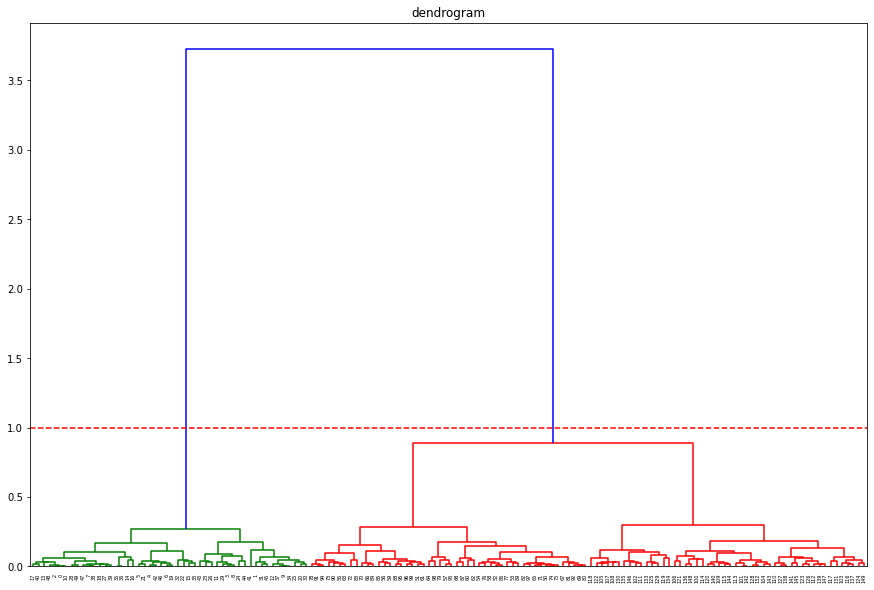

In [93]:
plt.figure(figsize=(15,10))
plt.title("dendrogram")
dend=shc.dendrogram(shc.linkage(cluster_data,method='ward'))
plt.axhline(y=1,color='r',linestyle='--')

In [94]:
## we have 2 clusters as the line cuts the dendrogram at two points

In [95]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(cluster_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

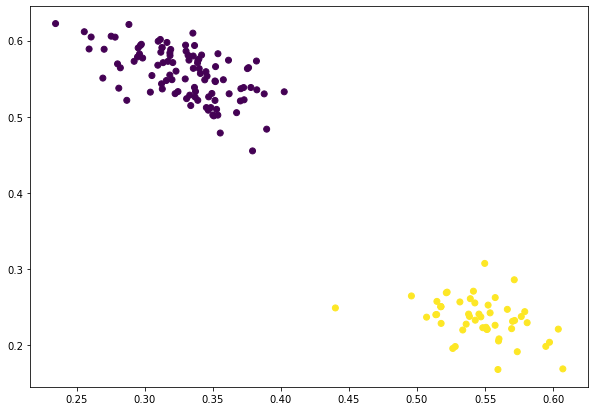

In [97]:
plt.figure(figsize=(10, 7))  
plt.scatter(cluster_data['SepalWidthCm'], cluster_data['PetalLengthCm'], c=cluster.labels_) 

## USING K MEANS ON THE DATASET

In [65]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.patches as mpatches
import sklearn.metrics as sm

## Data preprocessing

In [11]:
iris=datasets.load_iris()

In [15]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
from sklearn.preprocessing import scale
x=scale(iris.data)

In [52]:
data_x = pd.DataFrame(x, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
data_y = pd.DataFrame(iris.target, columns=['Target'])

In [53]:
data_x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [54]:
data_y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [55]:
variable_names=iris.feature_names

In [56]:
variable_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Build the model

In [57]:
km=KMeans(n_clusters=3,random_state=5)

In [58]:
km.fit(data_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [59]:
km.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [60]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [61]:
kx=km.fit_predict(x)
kx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## using the elbow method to check the no of clusters

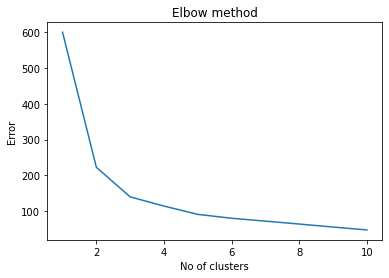

In [62]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## PLot

In [68]:
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')



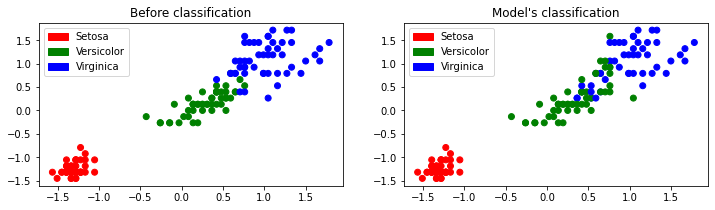

In [69]:

plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(km.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(data_x['Petal Length'], data_x['Petal Width'], c=colors[data_y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(data_x['Petal Length'], data_x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

## Accuracy

In [70]:
sm.accuracy_score(predictedY, data_y['Target'])

0.8333333333333334